# Dardar

The Dardar-cloud product can be downloaded by using the ``download`` method of the corresponding product object. Dardar-cloud contains amongst other ice water content and radar reflectivity at a horizontal resolution of 1.4 km and 60 m vertical resolution between -1.02 km and 25.08 km (see [here](https://web-backend.icare.univ-lille.fr/projects/dardar/documentation_dardar_cloud)).
For this example we will have a look at the ice water content and radar reflectivity.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from datetime import datetime
t_0 = datetime(2008, 4, 14, 12)
t_1 = datetime(2008, 4, 14, 14)

In [2]:
from pansat.products.satellite.dardar import dardar_cloud

files_dardar = dardar_cloud.download(t_0, t_1)

Please enter your pansat user password:


 ············


The variable ``files_dardar`` now contains the downloaded files. Now we only need to decipher the data format and extract the data of interest.

In [3]:
dataset = dardar_cloud.open(files_dardar[0])
display(dataset)

<xarray.Dataset>
Dimensions:     (range_bins: 436, rays: 37081, start_end: 2)
Coordinates:
  * rays        (rays) int64 0 1 2 3 4 5 ... 37075 37076 37077 37078 37079 37080
  * range_bins  (range_bins) int64 0 1 2 3 4 5 6 ... 429 430 431 432 433 434 435
    latitude    (rays) float32 -0.00754099 -0.01720915 ... 0.005906808
    longitude   (rays) float32 -164.67975 -164.68181 ... 170.60486 170.60281
    height      (range_bins) float32 25080.0 25020.0 24960.0 ... -960.0 -1020.0
    start_time  (rays, start_end) float64 4.823e+08 4.823e+08 ... 4.823e+08
Dimensions without coordinates: start_end
Data variables:
    iwc         (rays, range_bins) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    z           (rays, range_bins) float32 0.0 0.0 0.0 ... 0.17179084 0.21428905

Text(0.0, 1.0, '(a) Ice water content')

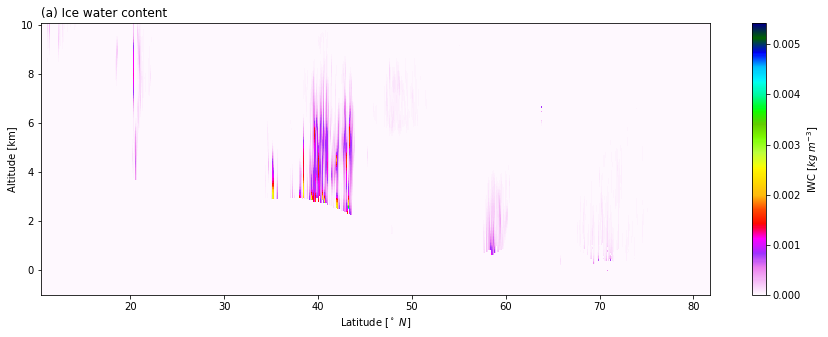

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

start = 25000
end = 36000
stride = 1
top = 250
iwc = dataset.iwc[start:end:stride,top:]
lats = dataset.latitude[start:end:stride]
height = dataset.height[top:]/1000

plt.figure(figsize=(15, 5))
plt.pcolormesh(lats, height, iwc.T, cmap=plt.get_cmap("gist_ncar_r"))
plt.colorbar(label=r"IWC [$kg \; m^{-3}$]")
plt.xlabel(r"Latitude [$^\circ\ N$]")
plt.ylabel("Altitude [km]");
plt.title("(a) Ice water content", loc="left")

Text(0.0, 1.0, '(b) Radar reflectivity')

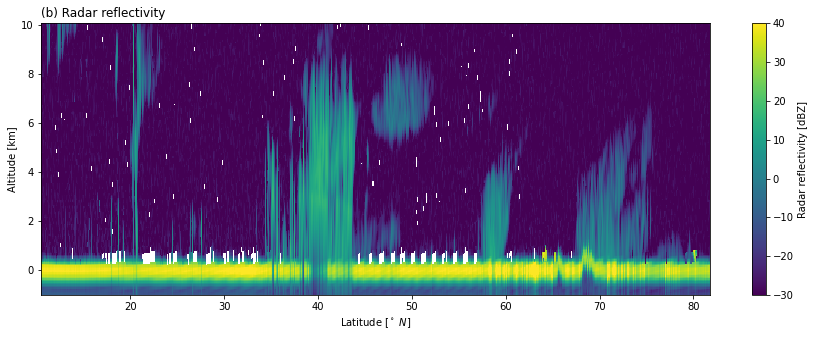

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

start = 25000
end = 36000
stride = 1
top = 250
z = dataset.z[start:end:stride,top:].where(dataset.z > 0)
dbz = 10 * np.log10(z)
lats = dataset.latitude[start:end:stride]
height = dataset.height[top:]/1000

plt.figure(figsize=(15, 5))
plt.pcolormesh(lats, height, dbz.T, norm=Normalize(-30, 40))
plt.colorbar(label=r"Radar reflectivity [dBZ]")
plt.xlabel(r"Latitude [$^\circ\ N$]")
plt.ylabel("Altitude [km]");
plt.title("(b) Radar reflectivity", loc="left")